In [1]:
import os
import cv2
import time
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from utils.datagenerator import EyeDataset


/home/choppy/anaconda3/envs/alcohol/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/choppy/anaconda3/envs/alcohol/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/choppy/anaconda3/envs/alcohol/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/choppy/anaconda3/envs/alcohol/lib/pyt

In [7]:
batch_size = 4
dim = (224, 224)
db_path = '/home/andres/TOC/datasets/alcohol/alcohol_v7.0'

trainG = EyeDataset(batch_size=batch_size, dim=dim)
trainG.load_eyes(db_path, subset='train')
trainG.prepare()

testG = EyeDataset(batch_size=batch_size, dim=dim)
testG.load_eyes(db_path, subset='test')
testG.prepare()

valG = EyeDataset(batch_size=batch_size, dim=dim)
valG.load_eyes(db_path, subset='val')
valG.prepare()

# Show train image example

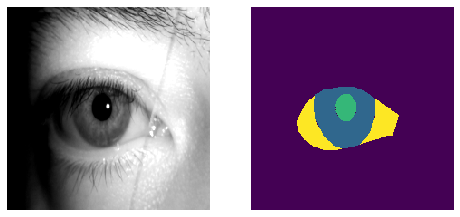

In [4]:
idx = np.random.choice(len(trainG))
im, lb = trainG[idx]

fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 1

fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.imshow(im[0])

fig.add_subplot(rows, columns, 2)
plt.axis('off')
plt.imshow(np.argmax(lb[0], axis=-1))
plt.show()

# Show validation image example

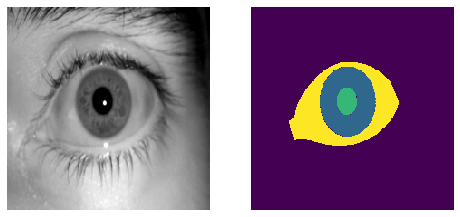

In [5]:
idx = np.random.choice(len(valG))
im, lb = valG[idx]
fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 1

fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.imshow(im[0])

fig.add_subplot(rows, columns, 2)
plt.axis('off')
plt.imshow(np.argmax(lb[0], axis=-1))
plt.show()

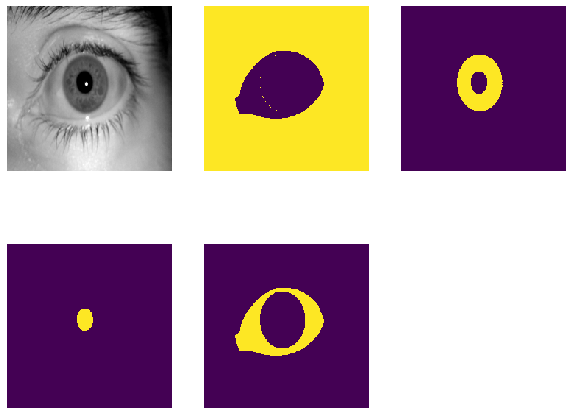

In [6]:
im, lb = valG[idx]
fig = plt.figure(figsize=(10, 8))
columns = 3
rows = 2

fig.add_subplot(rows, columns, 1)
plt.axis('off')
plt.imshow(im[0])

for c in range(lb.shape[-1]):
	fig.add_subplot(rows, columns, c+2)
	plt.axis('off')
	plt.imshow(lb[0, ..., c])

plt.show()

In [8]:
len(trainG), len(testG), len(valG)

(3729, 533, 1065)